In [1]:
import numpy as np
import pandas as pd

import datetime as dt

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [11]:
import os
os.name
# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='HYsanB')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

In [4]:
df = pd.read_csv('/Users/kimginam/Downloads/tonghapjoinfinal2.csv',encoding='cp949')
# dd = pd.read_csv('C:/Users/user/Downloads/agroupjoin.csv',encoding='cp949')

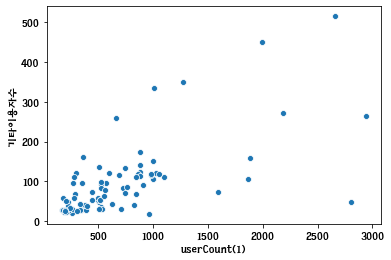

In [62]:
sns.scatterplot(x=dd['userCount(1)'],y=dd['기타이용자수'])

In [63]:
del dd['Unnamed: 0']
del df['Unnamed: 0']

In [64]:
# df.rename(columns={'같은정류소개수':'같은 정류장 개수'},inplace=True)

In [5]:
df['장애인노인인구수'] = df['노인인구수'] + df['장애인인구수']
# dd['장애인노인인구수'] = dd['노인인구수'] + dd['장애인인구수']

In [66]:
# df = df.set_index('정류소')

In [69]:
# z=df['기타이용자수']/10
# plt.figure(figsize=(12,8))
# plt.scatter(x=df['장애인노인인구수'],y=df['기타이용자수'],s=z*20,color='grey')

In [6]:
X = df[['노인인구수','대형병원','노인기관','시장','장애인복지기관','요양원','버스터미널','하나로마트','같은정류장개수','장애인노인인구수'
        ,'장애인인구수','userCount(1)']]
y = df['기타이용자수']

In [71]:
X1 = dd[['노인인구수','대형병원','노인기관','시장','장애인복지기관','요양원','버스터미널','하나로마트','같은정류소개수','장애인노인인구수'
        ,'장애인인구수','userCount(1)']]
y1 = dd['기타이용자수']

In [14]:
import matplotlib.font_manager as fm
plt.rcParams['axes.unicode_minus'] = False
path = '/Users/kimginam/Downloads/NanumBarunpenR.ttf'
font_name = fm.FontProperties(fname=path, size=12)

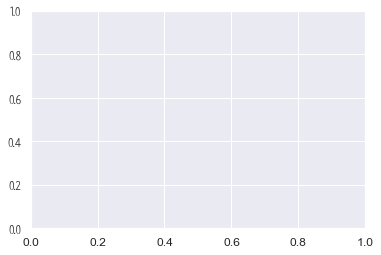

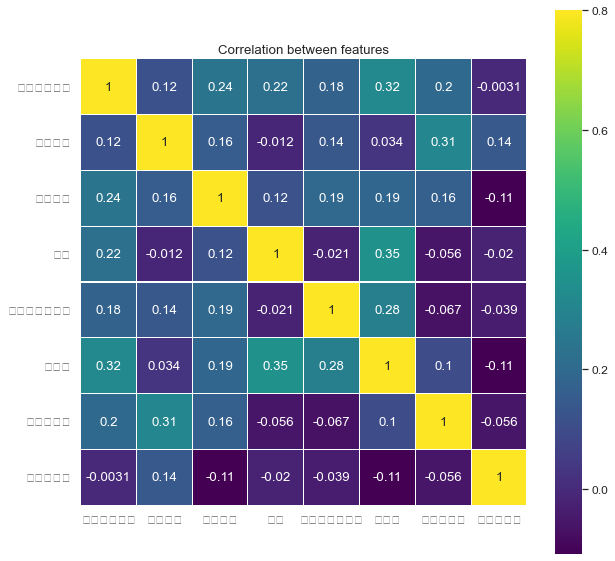

In [16]:
corrMatrix=df[["기타이용자수","대형병원","노인기관","시장",
"장애인복지기관","요양원","버스터미널","하나로마트"]].corr()
sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))
sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
square=True,annot=True,cmap='viridis',linecolor="white")

plt.title('Correlation between features');

In [7]:
corr_matrix = df.corr()
corr_matrix["기타이용자수"].sort_values(ascending=False) 

기타이용자수          1.000000
userCount(1)    0.794529
요양원             0.318295
노인기관            0.242986
시장              0.224335
버스터미널           0.199863
장애인복지기관         0.179053
Unnamed: 0      0.145619
대형병원            0.116276
노인인구수           0.036794
장애인노인인구수        0.022274
유동인구            0.021688
하나로마트          -0.003113
장애인인구수         -0.019217
공항             -0.037253
같은정류장개수        -0.178868
Name: 기타이용자수, dtype: float64

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
train_X = scaler.fit_transform(X)
train_X1 = scaler.fit_transform(X1)

In [74]:
# from  sklearn.preprocessing import StandardScaler
# sn= StandardScaler();
# train_X=sn.fit_transform(X)

In [75]:
# # for predictions
# train_X1 = scaler.fit_transform(X1.values)

In [76]:
# scaler.inverse_transform(train_X)

In [77]:
train_X, test_X, train_y, test_y= train_test_split(train_X,y,test_size=0.15, random_state=0)

In [78]:
my_model = XGBRegressor(n_estimators = 500, max_depth = 9,min_child_weight= 1.2,colsample_bytree = 1.0)
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=9,
             min_child_weight=1.2, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
from sklearn.metrics import mean_absolute_error

prediction = my_model.predict(test_X)
print("Mean Absolute Error : " + str(mean_absolute_error(prediction, test_y)))

Mean Absolute Error : 4.371021822480521


In [80]:
predictions = my_model.predict(train_X1)

In [81]:
predictions = list(predictions)

result = pd.DataFrame (predictions,columns=['predictions'])

result = result.reset_index()

In [82]:
y1 = pd.DataFrame (y1,columns=['기타이용자수'])

y1=y1.reset_index()

y1 = y1.merge(result, left_on='index', right_on='index', how='left')

y1.head(2)

,index,기타이용자수,predictions
0,0,96.523810,72.955467
1,1,123.095238,83.898201


In [83]:
del y1['기타이용자수']

dd = dd.reset_index()

dd = dd.merge(y1, left_on='index', right_on='index', how='left')

In [84]:
dd[['기타이용자수','predictions']]

,기타이용자수,predictions
0,96.523810,72.955467
1,123.095238,83.898201
2,117.119048,98.908470
3,117.500000,68.161491
4,105.261905,105.260651
...,...,...
82,27.380952,3.010028
83,26.690476,3.184544
84,117.488095,115.000015
85,118.464286,109.046783


In [85]:
we = dd.sort_values(by='기타이용자수',ascending=False)

In [86]:
ww = dd.sort_values(by='predictions',ascending=False)

In [104]:
ww[['기타이용자수','predictions']].head(20)

,기타이용자수,predictions
55,514.166667,514.166199
42,450.261500,450.260101
43,348.166667,343.918671
56,271.714286,271.714478
35,264.238095,264.237671
60,111.404762,222.634460
63,333.000000,213.983490
68,259.833333,146.870483
36,158.011905,131.046661
17,137.309524,119.035820


In [97]:
ww['정류소'].to_list()

['제주시청(광양방면)',
 '제주버스터미널',
 '시외버스출발지(가상정류소)',
 '제주시청(아라방면)',
 '한라병원',
 '시민회관',
 '중앙로(국민은행)',
 '중앙로(현대약국)',
 '제주도청신제주로터리',
 '남서광마을입구',
 '한림환승정류장(한림리)',
 '제주대학교병원',
 '제주중앙여자고등학교(광양방면)',
 '제주동중학교',
 '화북남문',
 '노형오거리',
 '용문사거리',
 '광양사거리',
 '제주민속오일장',
 '아라주공아파트',
 '인화초등학교',
 '관덕정',
 '고산동산(광양방면)',
 '제주지방법원(광양방면)',
 '천수동',
 '광양',
 '제주여자상업고등학교',
 '서문시장',
 '한국병원',
 '제주여자중고등학교(광양방면)',
 '제주국제공항(구제주방면)',
 '제주동초등학교',
 '용담1동주민센터',
 '삼양동주민센터',
 '제주고등학교/중흥S클래스',
 '함덕환승정류장(함덕해수욕장)',
 '제주대학교',
 '은남동',
 '연동주민센터',
 '탐라장애인종합복지관',
 '도호동',
 '정존마을',
 '정부제주지방합동청사',
 '제원아파트',
 '세화환승정류장(세화리)',
 '하귀초등학교',
 '중앙로(동문시장)',
 '신촌초등학교',
 '외도초등학교',
 '연동대림1차아파트',
 '삼양2동',
 '남서광마을',
 '큰동네',
 '서해아파트',
 '외도부영1차아파트',
 '노형우체국',
 '제주한라대학교',
 '남국원(광양방면)',
 '인다마을',
 '제주여자중고등학교(아라방면)',
 '고산동산(아라방면)',
 '아라동주민센터',
 '제주지방법원(아라방면)',
 '문예회관',
 '화북주공아파트',
 '외도부영2차아파트',
 '삼성초등학교',
 '보성시장',
 '중앙로(중앙성당)',
 '용천마을',
 '노형초등학교',
 '보건소',
 '삼양초등학교',
 '한라중학교/부영아파트',
 '조천리',
 '하귀우체국',
 '조천환승정류장(조천우체국)',
 '홍랑로입구',
 '신촌리',
 '도련1동',
 '용문마을회관',
 '한라수목원

In [102]:
we['정류소'].to_list()

['제주시청(광양방면)',
 '제주버스터미널',
 '시외버스출발지(가상정류소)',
 '중앙로(국민은행)',
 '제주시청(아라방면)',
 '한라병원',
 '중앙로(현대약국)',
 '고산동산(광양방면)',
 '중앙로(동문시장)',
 '제주도청신제주로터리',
 '제주대학교병원',
 '제주지방법원(광양방면)',
 '남서광마을입구',
 '한림환승정류장(한림리)',
 '제주여자상업고등학교',
 '광양',
 '남서광마을',
 '인화초등학교',
 '화북남문',
 '제주고등학교/중흥S클래스',
 '제주동중학교',
 '제주민속오일장',
 '제주중앙여자고등학교(광양방면)',
 '제주여자중고등학교(광양방면)',
 '시민회관',
 '천수동',
 '보성시장',
 '아라주공아파트',
 '노형오거리',
 '광양사거리',
 '중앙로(중앙성당)',
 '제주동초등학교',
 '세화환승정류장(세화리)',
 '삼양동주민센터',
 '관덕정',
 '용문사거리',
 '서문시장',
 '한국병원',
 '용담1동주민센터',
 '하귀초등학교',
 '제주국제공항(구제주방면)',
 '함덕환승정류장(함덕해수욕장)',
 '삼양초등학교',
 '연동주민센터',
 '탐라장애인종합복지관',
 '홍랑로입구',
 '아라동주민센터',
 '삼성초등학교',
 '제주여자중고등학교(아라방면)',
 '남국원(광양방면)',
 '제주지방법원(아라방면)',
 '고산동산(아라방면)',
 '노형우체국',
 '조천환승정류장(조천우체국)',
 '정부제주지방합동청사',
 '제주대학교',
 '한라중학교/부영아파트',
 '도호동',
 '서해아파트',
 '큰동네',
 '은남동',
 '외도부영1차아파트',
 '조천리',
 '화북주공아파트',
 '인다마을',
 '삼양2동',
 '하귀우체국',
 '용천마을',
 '제원아파트',
 '문예회관',
 '정존마을',
 '인화동',
 '한라수목원',
 '외도초등학교',
 '연동대림1차아파트',
 '신촌초등학교',
 '하귀환승정류장(하귀하나로마트)',
 '도련1동',
 '함덕리(3구)',
 '함덕농협지소',
 '신촌리',
 

In [88]:
my_model.score(test_X,test_y)

0.9421434764582229

In [89]:
my_model.score(train_X,train_y)

0.9999999990414945

In [90]:
# predictions = my_model.predict(train_X1)

In [91]:
# pre = list(predictions)

# result = pd.DataFrame (pre,columns=['predictions'])

# result.head(2)

In [92]:
# dd = dd.reset_index()
# result = result.reset_index()

# dd = dd.merge(result, left_on='index', right_on='index', how='left')

# dd = dd[['정류소','기타이용자수','predictions']]

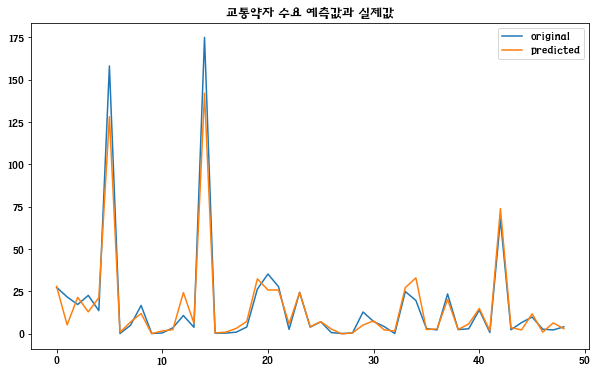

In [93]:
x_ax = range(len(test_y))
plt.figure(figsize=(10,6))
plt.plot(x_ax, test_y, label="original")
plt.plot(x_ax, prediction, label="predicted")
plt.title("교통약자 수요 예측값과 실제값")
plt.legend()
plt.show()